# Explore KeraCV

## Install dependencies

In [1]:
!pip -q install keras-core
!pip - qinstall git+https://github.com/keras-team/keras-cv.git




     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 10.0 MB/s eta 0:00:00
  Cloning https://github.com/keras-team/keras-cv.git to /tmp/pip-req-build-4akpcbrx
  Running command git clone --filter=blob:none --quiet https://github.com/keras-team/keras-cv.git /tmp/pip-req-build-4akpcbrx
  Resolved https://github.com/keras-team/keras-cv.git to commit 832e2d9539fd29a8348f38432673d14c18981df2
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for keras-cv: filename=keras_cv-0.6.4-py3-none-any.whl size=831746 sha256=f92cd9db5ad9474e52c07cc02f2794c8c26a9016575e6183ffa3bd7b2cb6e952
  Stored in directory: /tmp/pip-ephem-wheel-cache-8c0gw09k/wheels/c6/b2/32/7e1b003d0ab4505cc837840d2b8d5a0dd0a91e4219a68a1f1a
Successfully built keras-cv


In [2]:
import os

# Try picking a different value from "tensorflow", "jax" and "torch".
os.environ["KERAS_BACKEND"] = "jax"

# Setup

In [8]:
import keras_core as keras
import keras_cv
import numpy as np
import os
import resource
from keras_cv import visualization
import json
import matplotlib.pyplot as plt

## Image Classification

45500/45500 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step       


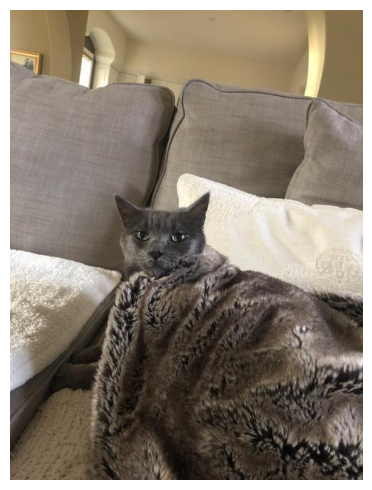

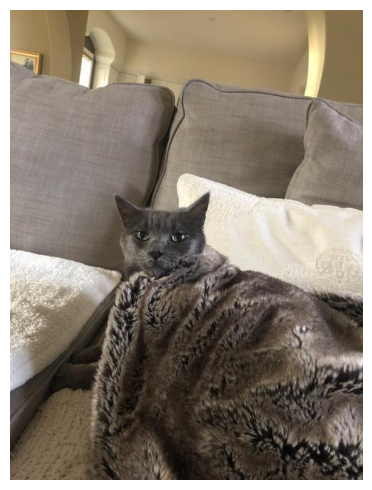

In [21]:
filepath = keras.utils.get_file(origin="https://i.imgur.com/9i63gLN.jpg")
image = keras.utils.load_img(filepath)
image = np.array(image)

visualization.plot_image_gallery(
    np.array([image]),
    value_range=(0, 255),
    rows=1,
    cols=1,
    scale=5,
)

In [22]:
classifier = keras_cv.models.ImageClassifier.from_preset(
    "efficientnetv2_b0_imagenet_classifier"
)

In [23]:
predictions = classifier.predict(np.expand_dims(image, axis=0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


In [24]:
top_classes = predictions[0].argsort(axis=-1)

In [25]:
classes = keras.utils.get_file(
    origin="https://gist.githubusercontent.com/LukeWood/62eebcd5c5c4a4d0e0b7845780f76d55/raw/fde63e5e4c09e2fa0a3436680f436bdcb8325aac/ImagenetClassnames.json"
)
with open(classes, "rb") as f:
    classes = json.load(f)
top_two = [classes[str(i)] for i in top_classes[-2:]]
print("Top two classes are:", top_two)

Top two classes are: ['Egyptian cat', 'velvet']


## Object Detection


1215963/1215963 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step       


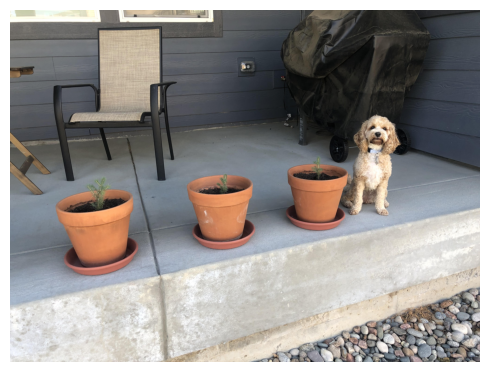

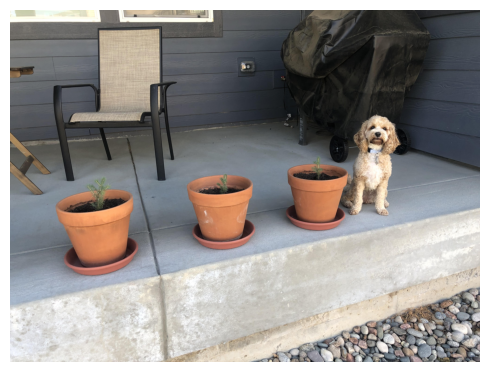

In [4]:
filepath = keras.utils.get_file(origin="https://i.imgur.com/gCNcJJI.jpg")
image = keras.utils.load_img(filepath)
image = np.array(image)

visualization.plot_image_gallery(
    np.array([image]),
    value_range=(0, 255),
    rows=1,
    cols=1,
    scale=5,
)

In [6]:
object_detection_model = keras_cv.models.RetinaNet.from_preset(
    "retinanet_resnet50_pascalvoc", bounding_box_format="xywh"
)

1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step


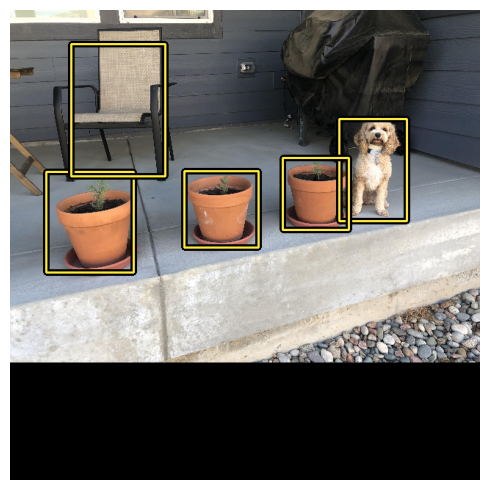

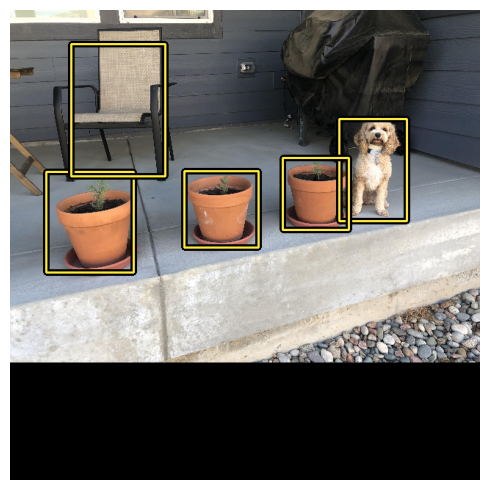

In [11]:

inference_resizing = keras_cv.layers.Resizing(
    640, 640, pad_to_aspect_ratio=True, bounding_box_format="xywh"
)
image_batch = inference_resizing([image])
y_pred = object_detection_model.predict(image_batch)
visualization.plot_bounding_box_gallery(
    image_batch,
    value_range=(0, 255),
    rows=1,
    cols=1,
    y_pred=y_pred,
    scale=5,
    font_scale=0.7,
    bounding_box_format="xywh",
)

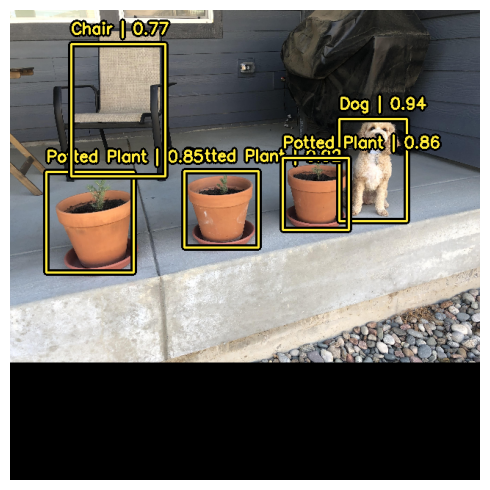

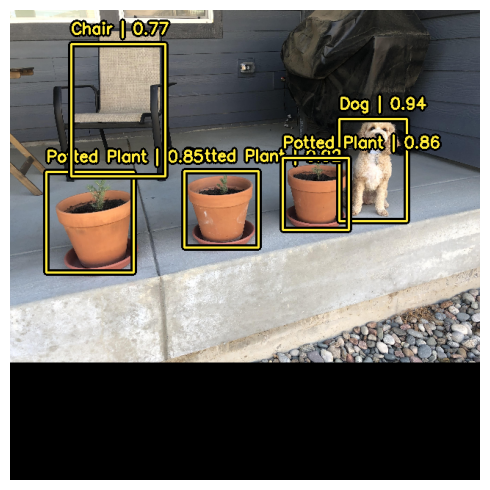

In [12]:
class_ids = [
    "Aeroplane",
    "Bicycle",
    "Bird",
    "Boat",
    "Bottle",
    "Bus",
    "Car",
    "Cat",
    "Chair",
    "Cow",
    "Dining Table",
    "Dog",
    "Horse",
    "Motorbike",
    "Person",
    "Potted Plant",
    "Sheep",
    "Sofa",
    "Train",
    "Tvmonitor",
    "Total",
]
class_mapping = dict(zip(range(len(class_ids)), class_ids))
visualization.plot_bounding_box_gallery(
    image_batch,
    value_range=(0, 255),
    rows=1,
    cols=1,
    y_pred=y_pred,
    scale=5,
    font_scale=0.7,
    bounding_box_format="xywh",
    class_mapping=class_mapping,
)

## Semantic Segmentation

In [5]:
segmentation_model = keras_cv.models.DeepLabV3Plus.from_preset(
    "deeplab_v3_plus_resnet50_pascalvoc",
    num_classes=21,
    input_shape=[512, 512, 3],
)

313992688/313992688 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


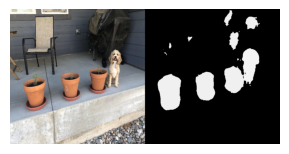

In [6]:
resize = keras_cv.layers.Resizing(height=512, width=512)
image = resize(image)
image = keras.ops.expand_dims(np.array(image), axis=0)
preds = keras.ops.expand_dims(keras.ops.argmax(segmentation_model(image), axis=-1), axis=-1)
keras_cv.visualization.plot_segmentation_mask_gallery(
    image,
    value_range=(0, 255),
    num_classes=1,
    y_true=None,
    y_pred=preds,
    scale=3,
    rows=1,
    cols=1,
)

## Image generation model - Stable Diffusion

In [7]:
image_gen_model = keras_cv.models.StableDiffusion(img_width=512, img_height=512)

By using this model checkpoint, you acknowledge that its usage is subject to the terms of the CreativeML Open RAIL-M license at https://raw.githubusercontent.com/CompVis/stable-diffusion/main/LICENSE


In [ ]:
images = image_gen_model.text_to_image("cute magical flying dog, fantasy art, "
    "golden color, high quality, highly detailed, elegant, sharp focus, "
    "concept art, character concepts, digital painting, mystery, adventure",
                                           batch_size=3)


def plot_images(images):
    plt.figure(figsize=(20, 20))
    for i in range(len(images)):
        ax = plt.subplot(1, len(images), i + 1)
        plt.imshow(images[i])
        plt.axis("off")


plot_images(images)

1356917/1356917 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step       
492466864/492466864 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
3439090152/3439090152 ━━━━━━━━━━━━━━━━━━━━ 35s 0us/step
